In [10]:
import numpy as np
import pandas as pd
import os

import preprocessing as pp
import model_gen as vae

from tensorflow import keras
from tensorflow.keras import layers

from matplotlib import pyplot as plt

In [4]:
time_step = 24

data_path = '/Users/baconbaker/Documents/Studium/ANM/anm-project/data/test_data/'
model_dir = 'deploy/'
thresh_dir = 'deploy/'

In [18]:
def find_anom(df):
    problems = []

    thresh = pd.read_csv(thresh_dir+'thresh.csv')

    for name in ['num', 'avg_time']:
        x_test = pp.get_esb_train_data(df, name, time_step)

        model = keras.models.load_model(model_dir+name)
        x_test_pred = model.predict(x_test)
        test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
        test_mae_loss = test_mae_loss.reshape((-1))
        anomalies = np.greater(test_mae_loss, thresh[thresh.name==name]['thresh'].values[0])
        
        plt.hist(test_mae_loss, bins=50)
        plt.xlabel("test MAE loss")
        plt.ylabel("No of samples")
        plt.show()
        
        plt.plot(x_test[0])
        plt.plot(model.predict(x_test)[0])
        plt.show()
        if True in anomalies:
            indices = []
            for i in range(len(anomalies)):
                if anomalies[i]:
                    indices.append(i)
                    
            print("Anomaly in ", name)
            problems.append((name, indices))
        if problems == []:
            print("No anomalies found in ", name)
    return problems

------------------------------------------------------------


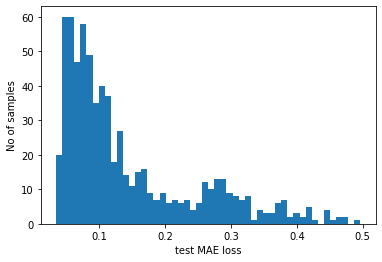

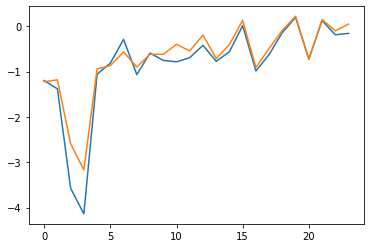

Anomaly in  num
------------------------------------------------------------


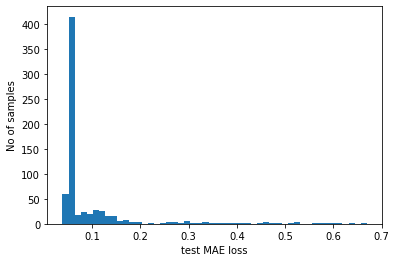

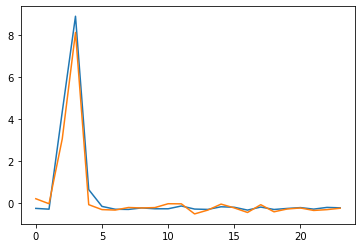

Anomaly in  avg_time


In [19]:
problems = find_anom(pp.load_esb(data_path))

In [21]:
df = pp.load_esb(data_path)

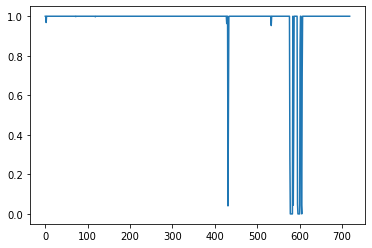

In [24]:
plt.plot(df['succee_rate'].values)
plt.show()